In [17]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [19]:
img_bgr = cv2.imread("/content/drive/MyDrive/Images/6/Baboon.bmp")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [20]:
def quantization (image, level):
  k_means = KMeans(n_clusters=level)
  k_means.fit(image.reshape((-1,3)))

  labels = k_means.labels_
  quantized_image = k_means.cluster_centers_[labels]

  return quantized_image.reshape((512,512,3)).astype('uint8')

In [21]:
def psnr(original, contrast):
  mse = np.mean((original - contrast) ** 2)

  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  
  PSNR = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

  return PSNR

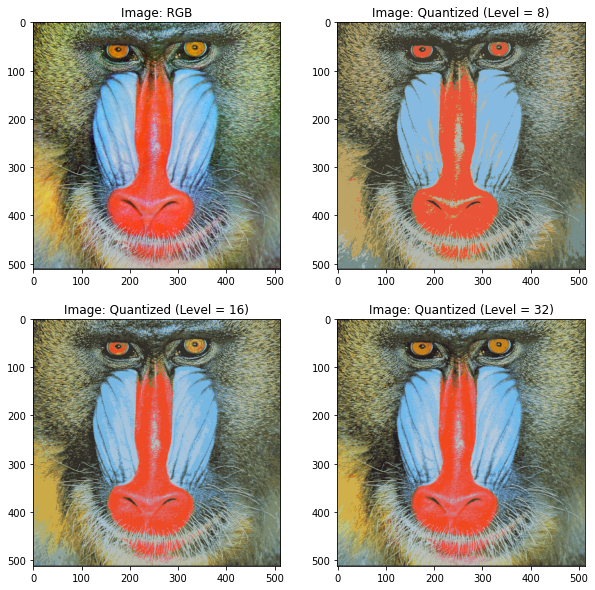

In [22]:
levels = [8, 16, 32]

quantized_images_mse = np.zeros(len(levels))
quantized_images_psnr = np.zeros(len(levels))

fig, plot = plt.subplots(int(len(levels) // 2) + 1, 2, figsize = (10, 5 * (int(len(levels) // 2) + 1)))

plot[0][0].imshow(img_rgb)
plot[0][0].set_title("Image: RGB")

for level_index in range (1, len(levels) + 1):

  quantized_image = quantization(img_rgb, levels[level_index - 1])

  quantized_images_mse[level_index - 1] = mean_squared_error(img_rgb.reshape((-1,3)), quantized_image.reshape((-1,3)))
  quantized_images_psnr[level_index - 1] = psnr(img_rgb.reshape((-1,3)), quantized_image.reshape((-1,3)))

  plot[int(level_index // 2)][int(level_index % 2)].imshow(quantized_image, cmap='gray')
  plot[int(level_index // 2)][int(level_index % 2)].set_title("Image: Quantized (Level = " + str(levels[level_index - 1]) + ")")

In [23]:
print("Quantized Image MSE & PSNR")
for level_index in range (len(levels)):
  print("Level = " + str(levels[level_index]) + "  &  MSE = " + str(quantized_images_mse[level_index]) + "  &  PSNR = " + str(quantized_images_psnr[level_index]))

Quantized Image MSE & PSNR
Level = 8  &  MSE = 86.48134231567383  &  PSNR = 28.76157938991043
Level = 16  &  MSE = 77.58442306518555  &  PSNR = 29.233058258971596
Level = 32  &  MSE = 66.68076705932617  &  PSNR = 29.890797737953775
